# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# to set figure size:
plt.rcParams['figure.figsize'] = [15, 8]

# to supress warnings
import warnings
warnings.filterwarnings('ignore')

# import scipy:
import scipy.stats as stats

# train test split:
from sklearn.model_selection import train_test_split

# to evaluate model performance:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Linear regression:
from sklearn.linear_model import LinearRegression

from statsmodels.api import OLS
from statsmodels.formula.api import ols

# feature selection:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# 2. Collect and load data

In [2]:
df1 = pd.read_csv('bigcity.csv')
df1.head()


,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df1.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

In [4]:
df1.rename(columns = {'Unnamed: 0' : 'City', 'u': '1920', 'x':'1930'}, inplace = True)
df1.head()

,City,1920,1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [5]:
df1.shape

(49, 3)

# 3. Explore numeric variables - five number summary

In [7]:
df1.describe()

,City,1920,1930
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   City    49 non-null     int64
 1   1920    49 non-null     int64
 2   1930    49 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

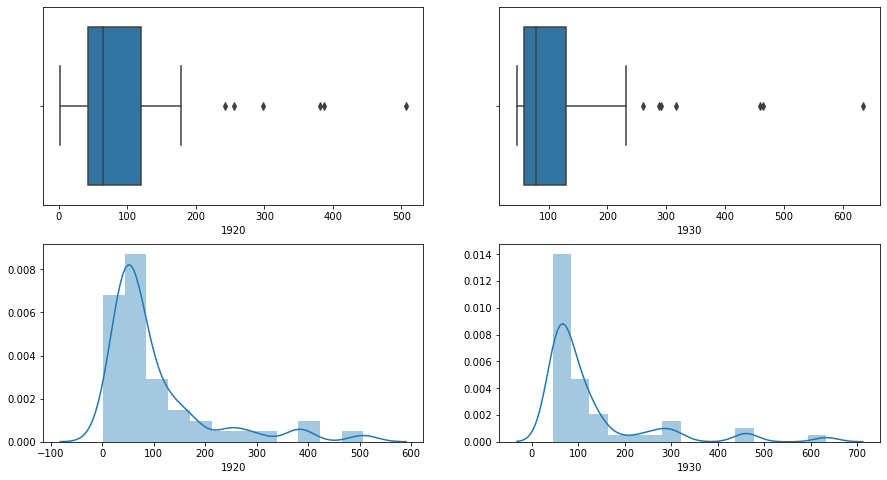

In [11]:
fig, axes = plt.subplots(2,2)

sns.boxplot(df1['1920'], ax = axes[0,0])
sns.boxplot(df1['1930'], ax = axes[0,1])
sns.distplot(df1['1920'], ax = axes[1,0])
sns.distplot(df1['1930'], ax = axes[1,1])
plt.show()

In [13]:
df1['1920'].std()

104.40506054146351

In [19]:
print("Variance and Standard Deviation for 1920 are:")
df1['1920'].std(), df1['1920'].var()

Variance and Standard Deviation for 1920 are:


(104.40506054146351, 10900.416666666662)

In [15]:
df1['1920'].var()

10900.416666666662

In [16]:
df1['1930'].std()

123.12121053252034

In [17]:
df1['1930'].var()

15158.832482993197

In [18]:
print("Variance and Standard Deviation for 1930 are:")
df1['1930'].std(), df1['1930'].var()

Variance and Standard Deviation for 1930 are:


(123.12121053252034, 15158.832482993197)

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

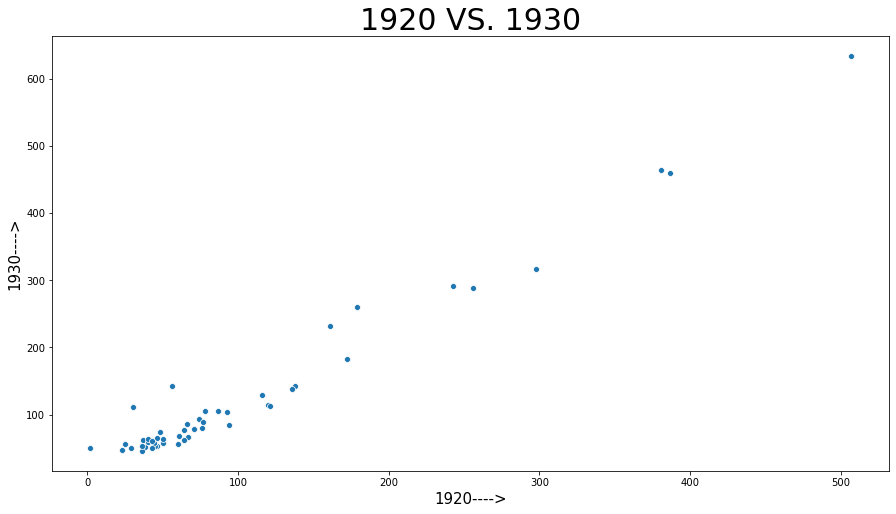

In [20]:
sns.scatterplot(x = '1920', y = '1930', data = df1)
plt.title('1920 VS. 1930', fontsize = 30)
plt.xlabel("1920---->", fontsize = 15)
plt.ylabel('1930---->', fontsize = 15)
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [21]:
X = df1['1920']
y = df1['1930']

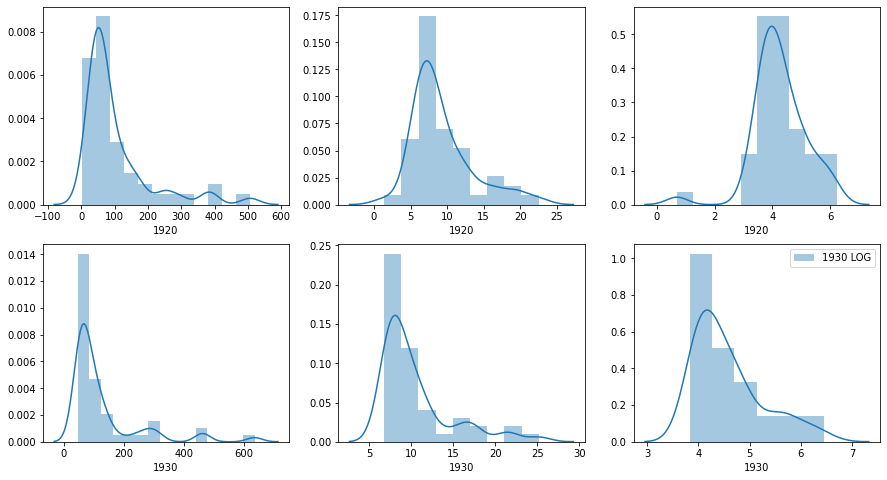

In [30]:
fig, ax = plt.subplots(2,3)
sns.distplot(df1['1920'], label = '1920 OG', ax = ax[0,0])
sns.distplot(np.sqrt(df1['1920']), label = '1920 SQRT', ax = ax[0,1])
sns.distplot(np.log(df1['1920']), label = '1920 LOG', ax = ax[0,2])
sns.distplot(df1['1930'], label = '1930 OG', ax = ax[1,0])
sns.distplot(np.sqrt(df1['1930']), label = '1930 SQRT', ax = ax[1,1])
sns.distplot(np.log(df1['1930']), label = '1930 LOG', ax = ax[1,2])
plt.legend()
plt.show()


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [22]:
df1.isnull().sum()

City    0
1920    0
1930    0
dtype: int64

In [24]:
df1[['1920', '1930']].corr()

,1920,1930
1920,1.000000,0.981742
1930,0.981742,1.000000


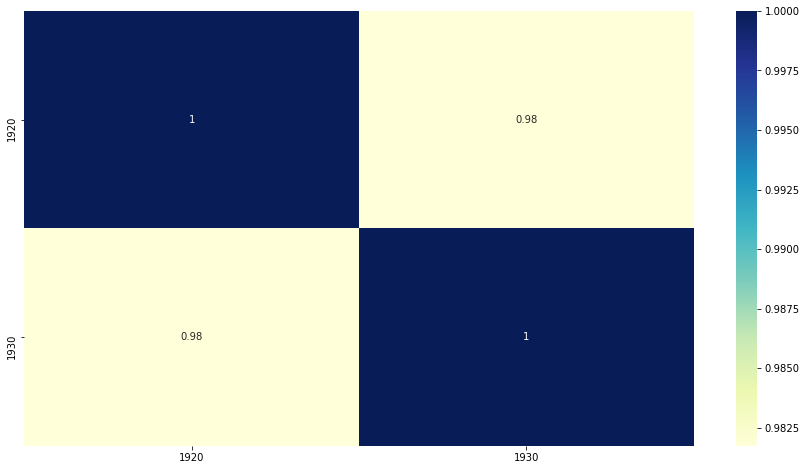

In [25]:
sns.heatmap(df1[['1920', '1930']].corr(), annot = True, cmap = 'YlGnBu')
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [31]:
X = df1['1920']
y = df1['1930']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 1)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(pd.DataFrame(xtrain), ytrain)

print("Beta0 = {}, Beta1 = {}".format(lr.coef_, lr.intercept_))

Beta0 = [1.15945123], Beta1 = 9.718455322828262


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

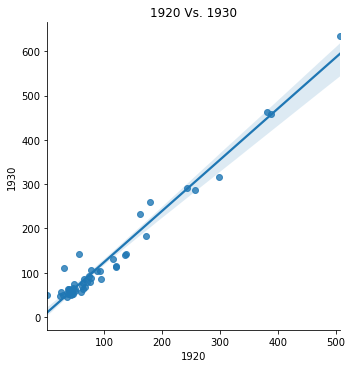

In [43]:
sns.lmplot(x = '1920', y = '1930', data = df1)
plt.title("1920 Vs. 1930")
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score = ", r2_score(ytrain, lr.predict(pd.DataFrame(xtrain))))
print("RMSE = ", np.sqrt(mean_squared_error(ytrain, lr.predict(pd.DataFrame(xtrain)))))

R2 Score =  0.9682175540860046
RMSE =  23.18943724391406


In [51]:
print("R2 Score = ", r2_score(ytest, lr.predict(pd.DataFrame(xtest))))
print("RMSE = ", np.sqrt(mean_squared_error(ytest, lr.predict(pd.DataFrame(xtest)))))

R2 Score =  0.9181922560396981
RMSE =  23.385235190249123


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [54]:
lr.score(pd.DataFrame(xtrain), ytrain)

0.9682175540860046

In [55]:
lr.score(pd.DataFrame(xtest), ytest)

0.9181922560396981